# **CNN**

## **Importing Modules**

In [1]:
import pickle 
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
from sklearn.metrics import f1_score, accuracy_score

Using TensorFlow backend.


## **Loading dataset & Model Configuration**

In [2]:
R_DIR = os.getcwd()
train_dir = os.path.join(R_DIR,"Dataset\\train")
val_dir = os.path.join(R_DIR,"Dataset\\val")

In [3]:
# Creating list of labels
label_list = []
try:
    plant_label_list = listdir(train_dir)

    for plant_labels in plant_label_list:
        print(f"Processing {plant_labels} ...")
        plant_disease_image_list = listdir(f"{train_dir}/{plant_labels}/")
        label_list.append(plant_labels)
          
except Exception as e:
    print(f"Error : {e}")

Processing Potato_Early_blight ...
Processing Potato_Healthy ...
Processing Potato_Late_blight ...
Processing Tomato_Healthy ...
Processing Tomato_Leaf_Mold ...
Processing Tomato_Leaf_spot ...


In [4]:
# Storing labels
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)

pickle.dump(label_binarizer,open('plant_labels.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

print("Total number of classes: ", n_classes)

Total number of classes:  6


In [5]:
# Preprocessing data
train_datagen=ImageDataGenerator(rescale=1./255)

val_datagen=ImageDataGenerator(rescale=1./255)

img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,target_size=(img_width,img_height),
                                                   batch_size=batch_size)
val_generator=val_datagen.flow_from_directory(val_dir,target_size=(img_width,img_height),
                                              batch_size=batch_size)

Found 3294 images belonging to 6 classes.
Found 822 images belonging to 6 classes.


In [7]:
# Model
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same",input_shape=input_shape))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dense(n_classes))
model.add(Activation("softmax"))

## **Model Training**

In [9]:
%%time
# Model building 
opt=keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
train=model.fit_generator(train_generator,
                          epochs=5,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data= val_generator,
                          validation_steps= val_generator.samples// batch_size,verbose=1)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
102/102 [==============================] - 1601s 16s/step - loss: 0.3781 - acc: 0.8646 - val_loss: 0.2151 - val_acc: 0.9263
Epoch 2/5
102/102 [==============================] - 1483s 15s/step - loss: 0.0524 - acc: 0.9885 - val_loss: 0.2237 - val_acc: 0.9203
Epoch 3/5
102/102 [==============================] - 1523s 15s/step - loss: 0.0222 - acc: 0.9982 - val_loss: 0.0999 - val_acc: 0.9633
Epoch 4/5
102/102 [==============================] - 1250s 12s/step - loss: 0.0165 - acc: 0.9994 - val_loss: 0.0949 - val_acc: 0.9684
Epoch 5/5
102/102 [==============================] - 1099s 11s/step - loss: 0.0110 - acc: 0.9994 - val_loss: 0.1021 - val_acc: 0.9722
Wall time: 1h 55min 57s


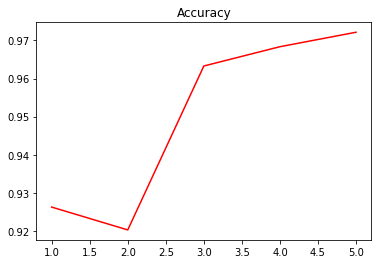

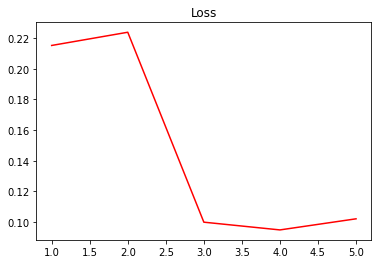

In [10]:
# Plotting Graph
acc = train.history['acc']
val_acc = train.history['val_acc']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(acc) + 1)
 
# Accuracy
plt.plot(epochs, val_acc, 'r', label='Accurarcy')
plt.title('Accuracy')
plt.figure()
# Loss
plt.plot(epochs, val_loss, 'r', label='loss')
plt.title('Loss')
plt.show()

### *

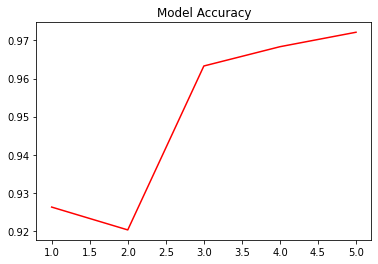

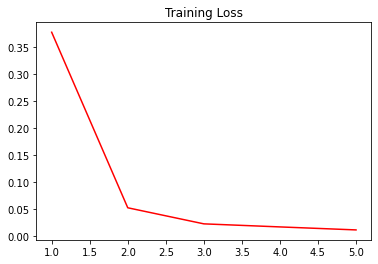

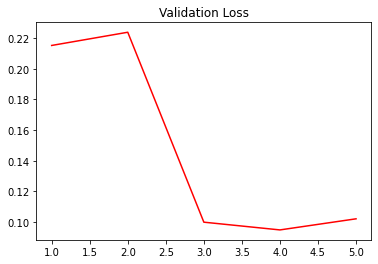

In [11]:
# Plotting Graph
acc = train.history['acc']
val_acc = train.history['val_acc']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(acc) + 1)

# Accuracy
plt.plot(epochs, val_acc, 'r', label='accuracy')
plt.title('Model Accuracy')
plt.figure()

# Training Loss
plt.plot(epochs, loss, 'r', label=' train loss')
plt.title('Training Loss')
plt.show()

# Validation Loss
plt.plot(epochs, val_loss, 'r', label='val loss')
plt.title('Validation Loss')
plt.show()

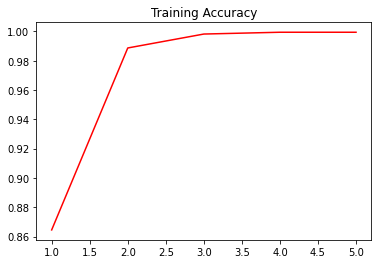

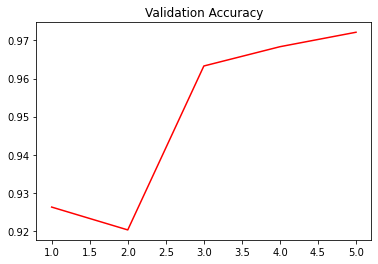

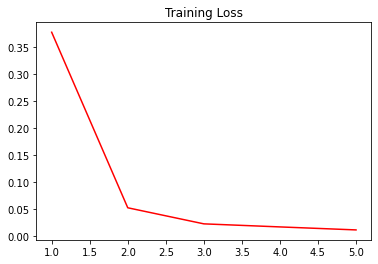

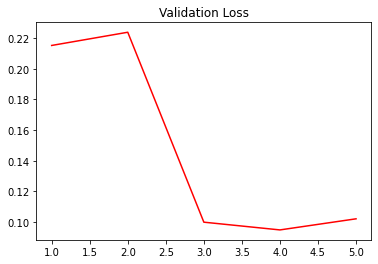

In [12]:
# Plotting Graph
acc = train.history['acc']
val_acc = train.history['val_acc']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(acc) + 1)

# Training Accuracy
plt.plot(epochs, acc, 'r', label='train accuracy')
plt.title('Training Accuracy')
plt.figure()

# Validation Accuracy
plt.plot(epochs, val_acc, 'r', label='val accuracy')
plt.title('Validation Accuracy')
plt.figure()

# Training Loss
plt.plot(epochs, loss, 'r', label=' train loss')
plt.title('Training Loss')
plt.show()

# Validation Loss
plt.plot(epochs, val_loss, 'r', label='val loss')
plt.title('Validation Loss')
plt.show()

In [13]:
# Saving model
model.save('plant_health_CNN_model.h5')

## **Model Testing**

In [10]:
import pickle 
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
from IPython.display import clear_output

In [11]:
# Loading model
model=load_model('plant_health_CNN_model.h5')

# Loading labels
image_labels = pickle.load(open('plant_labels.pkl', 'rb'))
clear_output()

In [36]:
def detect_health(pth):
  img = image.load_img(pth, target_size=(256, 256))
  x = image.img_to_array(img)
  x = x/255
  maximum=max(model.predict(np.expand_dims(x, axis=0)))
  mx=max(maximum)
  if mx > 0.80:
    result = np.argmax(model.predict([np.expand_dims(x, axis=0)]),axis=1)
    result_label= image_labels.classes_[result][0]
    load_image=image.load_img(pth)
    plt.figure(figsize=(6, 6))
    plt.axis('off')
    plt.title(result_label)
    plt.imshow(load_image)
  else:
    load_image=image.load_img(pth)
    plt.figure(figsize=(6, 6))
    plt.axis('off')
    plt.title('Detection Error: Unable to detect, Try again with valid image')
    plt.imshow(load_image)

Enter Potato or Tomato leaf image path:C:\Users\AMWagle\Plant_Health\Plant_Health_CNN\Test\tlm(4).jpg


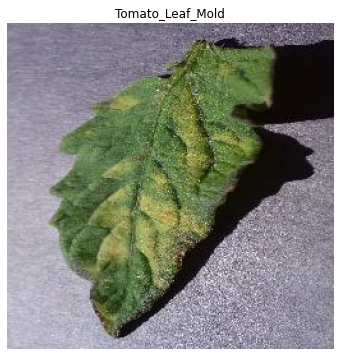

In [37]:
pth = input("Enter Potato or Tomato leaf image path:")
pth2 = pth.replace('"','')
detect_health(pth2)

## **Evaluation**

In [12]:
# F1-score claculation
model=load_model('plant_health_CNN_model.h5')
image_labels = pickle.load(open('plant_labels.pkl', 'rb'))

img_paths=[]
actual =[]
predicted =[]
R_DIR=os.getcwd()
path = os.path.join(R_DIR,"Validation")
def getFiles(path):
    for file in os.listdir(path):
      img_paths.append(os.path.join(path, file))
getFiles(path)

def evaluation(pth):
  imglabel = pth.split('\\')[6]
  imglabel2= imglabel.split('(')[0]
  actual.append(imglabel2)
  img = image.load_img(pth, target_size=(256, 256))
  x = image.img_to_array(img)
  x = x/255
  result = np.argmax(model.predict([np.expand_dims(x, axis=0)]),axis=1)
  predictions = image_labels.classes_[result][0]
  predicted.append(predictions)

for i in img_paths:
  evaluation(i)

clear_output()

In [34]:
acc=accuracy_score(actual,predicted)
print("Accuracy =",round(acc,3))
f1=f1_score(actual,predicted,average='weighted')
print("F1-Score =",round(f1,3))

Accuracy = 0.971
F1-Score = 0.971
